In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Load the benchmarks created in Step 2
# Note: In a real workflow, you would load df_mean, df_knn, and df_mice
# For this script, we assume they were saved to data/processed/
datasets = {
    'Mean Imputation': pd.read_csv('../data/processed/pima_mean_imputed.csv'),
    'KNN Imputation': pd.read_csv('../data/processed/pima_knn_imputed.csv'),
    'MICE (Research Standard)': pd.read_csv('../data/processed/pima_mice_imputed.csv')
}

results = {}

In [3]:
def train_and_evaluate(df, label):
    X = df.drop(columns=['Outcome'])
    y = df['Outcome']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    
    fpr, tpr, _ = roc_curve(y_test, probs)
    return auc, fpr, tpr

for name, df in datasets.items():
    auc, fpr, tpr = train_and_evaluate(df, name)
    results[name] = {'auc': auc, 'fpr': fpr, 'tpr': tpr}
    print(f"✅ {name} Performance: AUC = {auc:.4f}")

✅ Mean Imputation Performance: AUC = 0.8296
✅ KNN Imputation Performance: AUC = 0.8298
✅ MICE (Research Standard) Performance: AUC = 0.8167


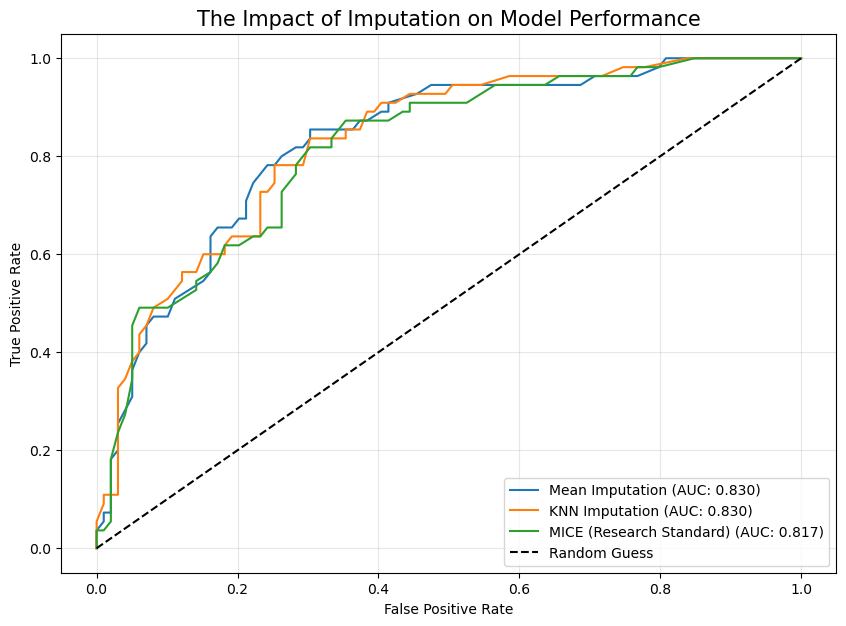

In [4]:
plt.figure(figsize=(10, 7))

for name, data in results.items():
    plt.plot(data['fpr'], data['tpr'], label=f"{name} (AUC: {data['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Impact of Imputation on Model Performance', fontsize=15)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../reports/figures/imputation_impact_roc.png')
plt.show()